### Importing Libraries

In [131]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import warnings


import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi

# Task 1

   ## Reading Data Set

In [132]:
service_311 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)
warnings.filterwarnings('ignore' )

In [133]:
service_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [134]:
service_311.shape

(300698, 53)

In [135]:
service_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

###### There are a lot of columns in our dataset. However we don't need all of them. So we can drop the columns which have a very large number of null values in it.

## Reading Columns

In [136]:
service_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

### Dropping irrelevant columns from datasets

In [137]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']


service_311.drop(drop_columns, axis = 1, inplace = True)

In [138]:
service_311

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,Your complaint has been forwarded to the New Y...,Unspecified,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587


In [139]:
service_311.shape

(300698, 14)

##### checking the number of null values in the columns

In [140]:
service_311.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

###  selecting the closed cases only to eliminate the null values

In [141]:
service_311_2 = service_311[service_311['Status'] == 'Closed']

In [142]:
service_311_2.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

###  since all the cases are of closed cases now we can drop the column Status as every value of its data are same

In [143]:
service_311_3 = service_311_2.drop(['Status'], axis = 1)

In [144]:
service_311_3

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.837708,-73.834587


In [145]:
service_311_3.shape

(298471, 13)

In [146]:
service_311_3 = service_311_3[(service_311_3['Descriptor'].notnull()) & (service_311_3['Latitude'].notnull()) &(service_311_3['Longitude'].notnull())]
service_311_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [147]:
service_311_3.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [148]:
service_311_3 = service_311_3[(service_311_3['Location Type'].notnull()) & (service_311_3['Incident Zip'].notnull()) &(service_311_3['City'].notnull())]
service_311_3.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

## All the null values have been removed

In [149]:
service_311_3.shape

(291107, 13)

# Task 2

## converting 'Created Date' and 'Closed Date' to datetime datatype

In [150]:
cols = ['Created Date', 'Closed Date']
for col in cols:
    service_311_3[col] = pd.to_datetime(service_311_3[col],infer_datetime_format=True)


service_311_3['Request_Closing_Time'] = service_311_3[cols[1]] - service_311_3[cols[0]]
    
service_311_3.head(10)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Resolution Description,Borough,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,0 days 03:27:02
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,BROOKLYN,The Police Department responded and upon arriv...,BROOKLYN,40.660823,-73.992568,0 days 01:53:30
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,NEW YORK,The Police Department issued a summons in resp...,MANHATTAN,40.840848,-73.937375,0 days 01:57:28
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10457.0,BRONX,The Police Department responded to the complai...,BRONX,40.837503,-73.902905,0 days 01:47:55
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,KEW GARDENS,The Police Department responded to the complai...,QUEENS,40.704977,-73.832605,0 days 08:33:02
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11219.0,BROOKLYN,The Police Department responded and upon arriv...,BROOKLYN,40.623793,-73.999539,0 days 01:23:02


## Task 3

* Visualization
* Atleast 4 Main Conclusions

In [151]:
service_311_3.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
std,5.753777e+05,580.280774,0.082411,0.078654,0 days 06:03:45.509089128
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22


In [152]:
service_311_3['Complaint Type'].value_counts()

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

In [153]:
service_311_3['Agency'].value_counts()

NYPD    291107
Name: Agency, dtype: int64

<AxesSubplot:title={'center':'Complaint Type'}>

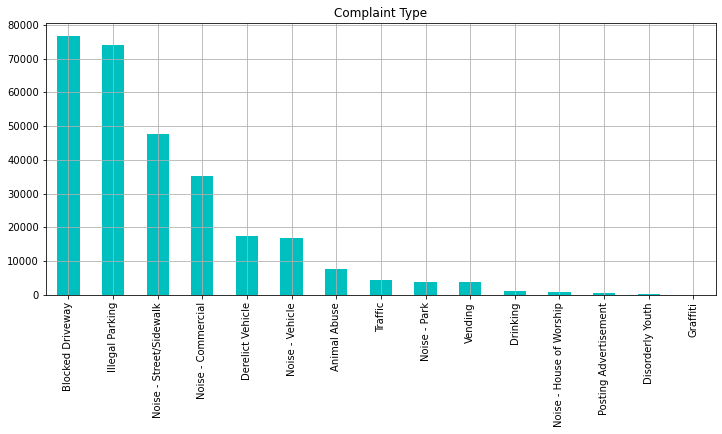

In [154]:
service_311_3['Complaint Type'].value_counts().plot(kind = 'bar', figsize = (12,5), title = 'Complaint Type', color = 'c', grid = True)

######         As we can see the Blocked Driveway is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

In [155]:
service_311_3['Descriptor'].value_counts().head(10)

Loud Music/Party                 60444
No Access                        56725
Posted Parking Sign Violation    22103
Loud Talking                     21254
Partial Access                   19951
With License Plate               17506
Blocked Hydrant                  15837
Commercial Overnight Parking     11908
Car/Truck Music                  11114
Blocked Sidewalk                 10930
Name: Descriptor, dtype: int64

<AxesSubplot:title={'center':'Top 10 Descriptor'}>

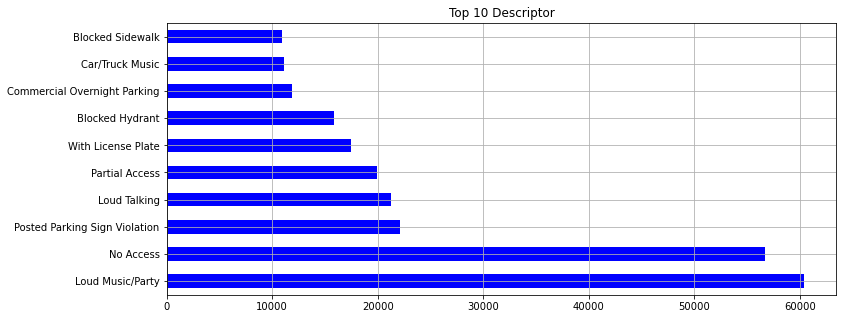

In [156]:
service_311_3['Descriptor'].value_counts().head(10).plot(kind = 'barh', figsize = (12,5), title = 'Top 10 Descriptor', color = 'b', grid = True)

#### we can clearly see the Loud Music/Party is the maximum descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.

In [157]:
service_311_3['Location Type'].value_counts().head(10)

Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          196
Parking Lot                      116
House and Store                   93
Name: Location Type, dtype: int64

<AxesSubplot:title={'center':'Top 10 Location'}>

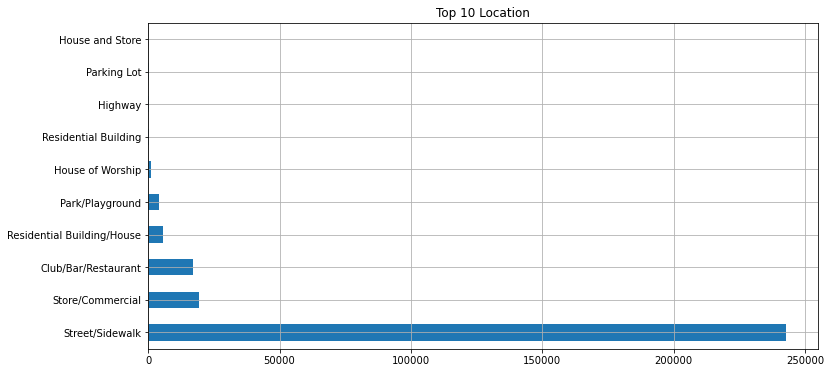

In [158]:
service_311_3['Location Type'].value_counts().head(10).plot(kind = 'barh',figsize = (12,6), title = 'Top 10 Location', grid = True)

###   As we can see the Location Type of 'Street/Sidewalk' is a lot more than any other members of its category

In [159]:
service_311_3['City'].value_counts().head(10)

BROOKLYN         96858
NEW YORK         61935
BRONX            40216
STATEN ISLAND    12211
JAMAICA           7155
ASTORIA           6254
FLUSHING          5916
RIDGEWOOD         5124
CORONA            4265
WOODSIDE          3493
Name: City, dtype: int64

Text(0.5, 0, 'Complaint Type')

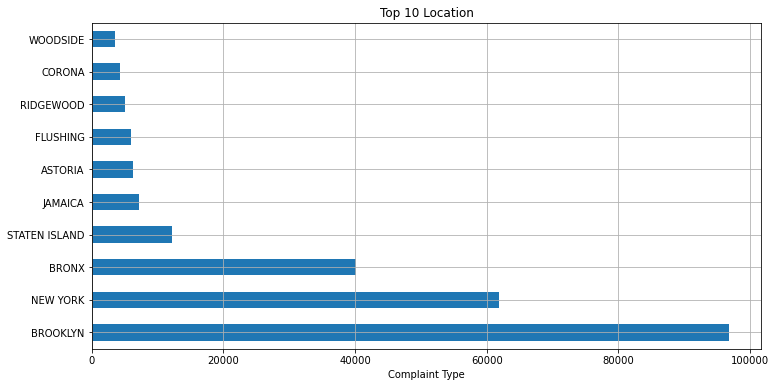

In [160]:
service_311_3['City'].value_counts().head(10).plot(kind = 'barh',figsize = (12,6), title = 'Top 10 Location', grid = True)
plt.xlabel('Complaint Type')

####                  As we can see the most complaints are from 'BROOKLYN' followed New York, Bronx, Staten Island in City wise

 ### Analysing Borough and Complaint Types

 

In [161]:
top_six_complaints = service_311_3['Complaint Type'].value_counts()[:6].keys()
top_six_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [162]:
borough_complaints = service_311_3.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_six_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12740,7829,8864,2431,1948,3385
BROOKLYN,28119,27386,13315,11451,5164,5145
MANHATTAN,2055,11981,20362,14528,530,5374
QUEENS,31621,21944,4391,6057,8102,2608
STATEN ISLAND,2141,4881,815,677,1762,356


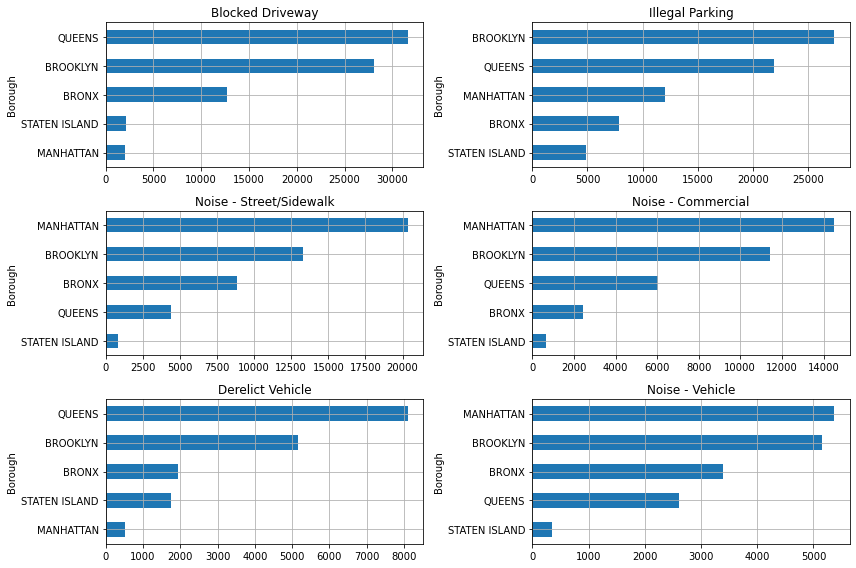

In [163]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(borough_complaints.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

# What we have analysed

** Blocked Driveway is maximum in QUEENS
** Illegal Parking is maximum in BROOKLYN
** Noise - Street/Sidewalk is maximum in MANHATTAN
** Noise - Commercial is maximum in MANHATTAN
** Derelict Vehicle is maximum in QUEENS
** Noise - Vehicle is maximum in QUEENS

In [164]:
top_borough = service_311_3['Borough'].value_counts().keys()

complaint_per_borough = service_311_3.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1412,557
Blocked Driveway,28119,31621,2055,12740,2141
Derelict Vehicle,5164,8102,530,1948,1762
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,187,175
Graffiti,43,37,22,9,2
Illegal Parking,27386,21944,11981,7829,4881
Noise - Commercial,11451,6057,14528,2431,677
Noise - House of Worship,338,297,189,79,17


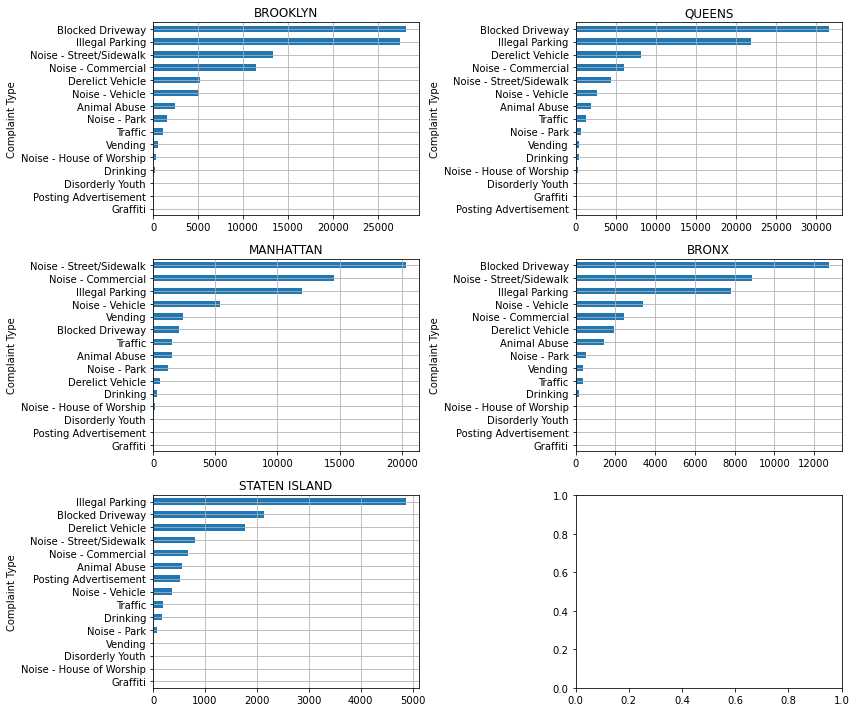

In [165]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(complaint_per_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

#### What we have analysed :

* (i) BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
* (ii) MANHATTAN has most complaints of Noise - Street/Sidewalk.
* (iii) STATEN ISLAND has most complaints of Illegal Parking.

# Task 4
    
    -Ordering the complaint types based on average response time for different locations

In [166]:
service_311_3['Request_Closing_Time_in_Hours'] = service_311_3['Request_Closing_Time'].astype('timedelta64[h]')+1
service_311_3[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0


In [167]:
data_avg_time_in_hrs = service_311_3.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head()

City     Complaint Type  
ARVERNE  Animal Abuse        2.631579
         Blocked Driveway    3.028571
         Derelict Vehicle    3.407407
         Disorderly Youth    4.000000
         Drinking            1.000000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [168]:
service_311_3['Request_Closing_Time_in_Seconds'] = service_311_3['Request_Closing_Time'].astype('timedelta64[s]')
service_311_3[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()


,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,3315.0
1,0 days 01:26:16,2.0,5176.0
2,0 days 04:51:31,5.0,17491.0
3,0 days 07:45:14,8.0,27914.0
4,0 days 03:27:02,4.0,12422.0


In [169]:
data_avg_in_seconds = service_311_3.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 7753.052632
         Blocked Driveway             9093.485714
         Derelict Vehicle            10685.592593
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5520.000000
         Illegal Parking              8338.913793
         Noise - Commercial           8234.000000
         Noise - House of Worship     5623.909091
         Noise - Park                 4620.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

In [170]:
service_311_3['Request_Closing_Time'].describe()

count                       291107
mean     0 days 04:18:32.132665995
std      0 days 06:03:45.509089128
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:24
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [172]:
mean_hrs = service_311_3['Request_Closing_Time_in_Hours'].mean()
std_hrs = service_311_3['Request_Closing_Time_in_Hours'].std()

mean_seconds = service_311_3['Request_Closing_Time_in_Seconds'].mean()
std_seconds = service_311_3['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean Secondsis {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard Seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 4.82 hours and mean Secondsis 15512.13 seconds
The standard hours is 6.06 hours and standard Seconds is 21825.51 seconds


### Analysing Complaint Types column on the basis of Months by refering to Created Date

In [173]:
service_311_3['Year-Month'] = service_311_3['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))


In [174]:
service_311_3['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03'], dtype=object)

  ### we got incident complaints from March to December

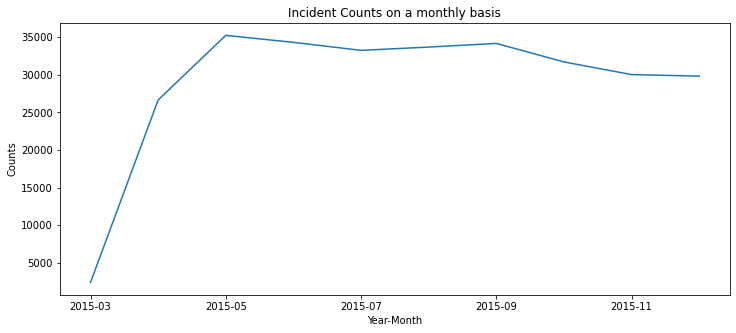

In [175]:
monthly_incidents =  service_311_3.groupby('Year-Month').size().plot(figsize=(12,5),
                                                               title='Incident Counts on a monthly basis', ylabel='Counts')

###  As we can see that we don't have any complaints from January and Ferbruary in our dataset because we might have eliminated them as Null Values earlier.

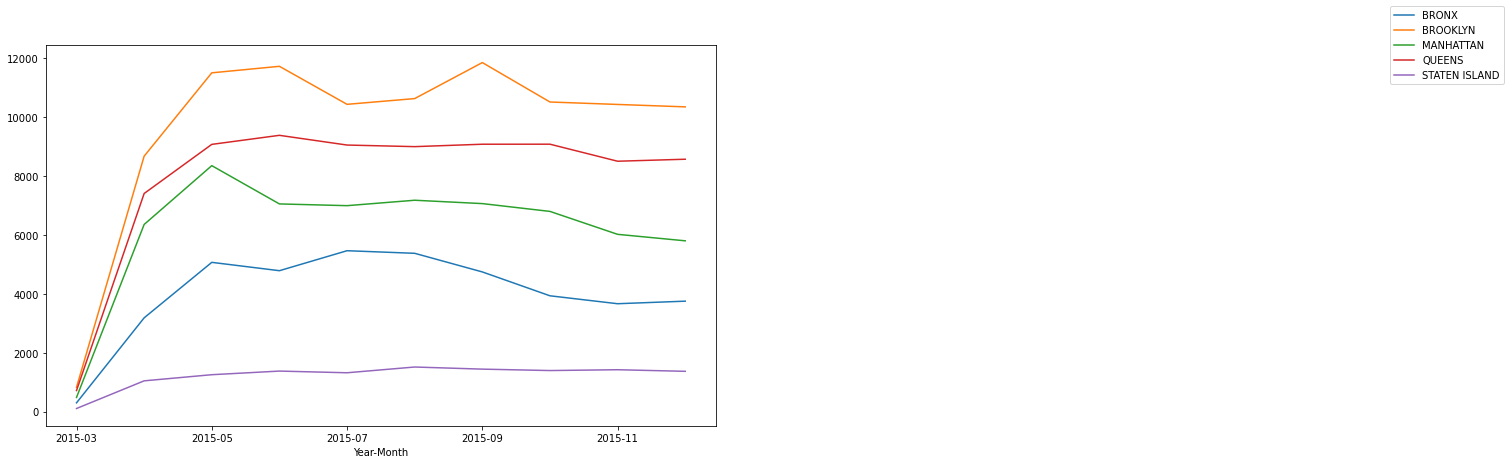

In [180]:
service_311_3.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(12,7))
plt.legend(loc='center left', bbox_to_anchor=(2.0, 1))

### As we can see Brooklyn raised most cases all over and most of them were raised in May-June and SEPTEMBER.

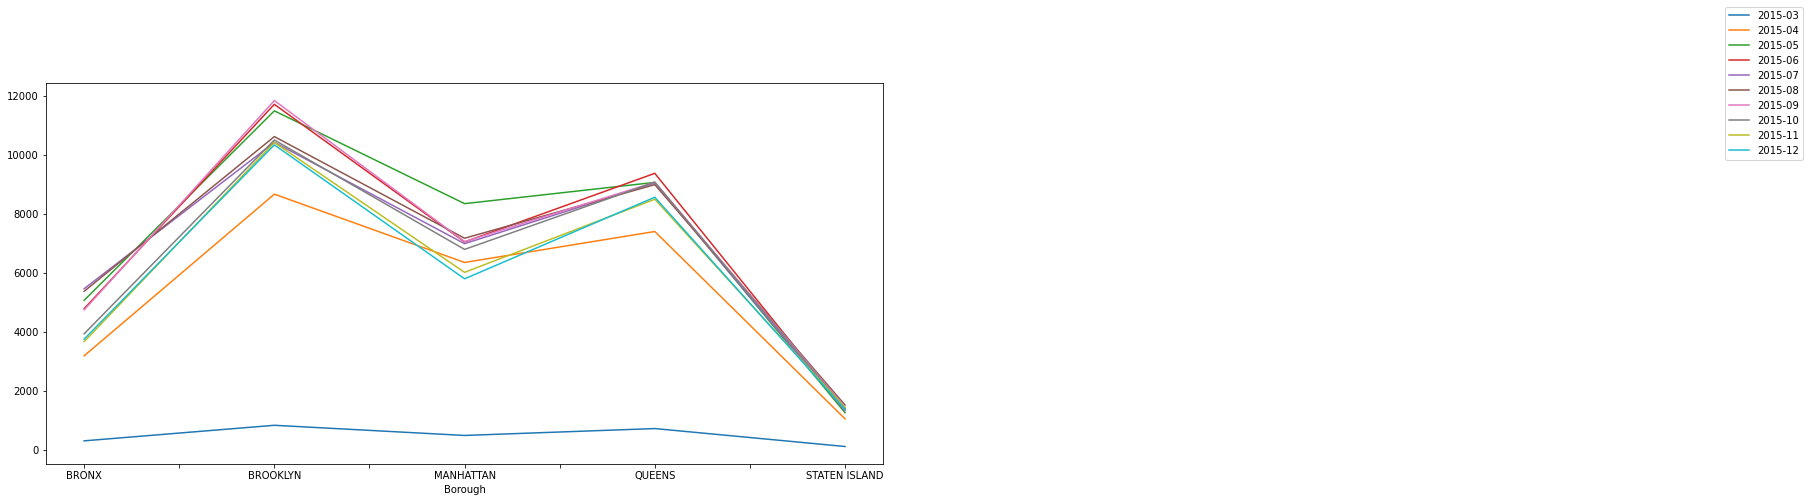

In [181]:
service_311_3.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(2.0, 1))

### December has raised least complaints.

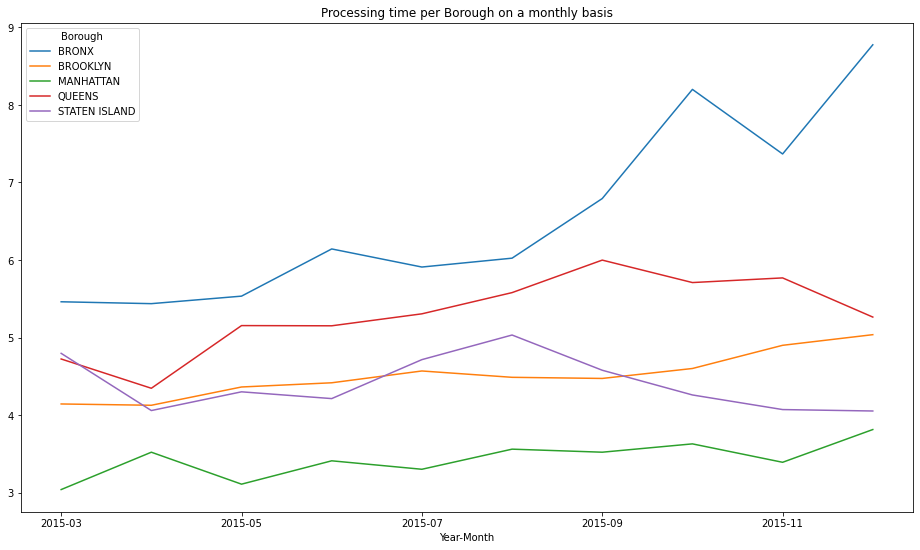

In [185]:
service_311_3.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(16,9),
                                                                        title='Processing time per Borough on a monthly basis');

### *Bronx has the maximum Processing time every month moreover it has the least complaints.

# Task 5

### Statistical Test

- Whether the average response time across complaint types is similar or not (overall)
- Are the type of complaint or service requested and location related?


In [204]:

service_311_3.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month',
       'Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship',
       'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending',
       'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype='object')

### F- Test

##### Testing at Confidence level(95%) => alpha value = 0.05
* Null Hypothesis : H0 : There is no significant difference in average response time across different complaint types
* Alternate Hypothesis : H1 : There is a significant difference in average response time across different complaint types

In [205]:
avg_response_time = service_311_3.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7113.582689
Noise - Commercial          11294.078335
Noise - House of Worship    11519.116304
Noise - Park                12249.610644
Noise - Street/Sidewalk     12392.210610
Traffic                     12426.186968
Disorderly Youth            12847.733333
Noise - Vehicle             12953.606711
Drinking                    13885.939370
Vending                     14442.301617
Illegal Parking             16140.427217
Blocked Driveway            17056.511751
Animal Abuse                18786.728951
Graffiti                    25744.504425
Derelict Vehicle            26450.507426
Name: Request_Closing_Time_in_Seconds, dtype: float64

In [206]:
data = {}
for complaint in service_311_3['Complaint Type'].unique():
    data[complaint] = np.log(service_311_3[service_311_3['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [207]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [208]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029853481161118
0.9759835331364468
1.07759350645833
1.2579717580716774
1.0889851891911977
1.1764769203426566
1.2223658746794284
1.0766368282265082
1.0439938309706467
1.1124255292109804
1.183766057955533
1.0462752311468753
1.119443436237754
1.0644915295126962
1.0383245818152775


In [209]:
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2452.471, p = 0.000
We have Different distributions (reject H0)


#### As we can see that our p-value is quite low , hence it is being converted to 0.0

* Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

* Average response time for all the complaints type is not same.

##  For relation between Complaint Type and Location
- we will use Crosstab and Chi-square Test

In [212]:
city_type = pd.crosstab(service_311_3['City'], service_311_3['Complaint Type'])
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,38,35,27,2,1,1,58,2,11,2,29,7,0,0,1
ASTORIA,125,2618,351,3,35,4,1065,1282,19,61,385,204,1,47,54
Astoria,0,116,12,0,0,0,213,261,0,0,114,0,0,0,0
BAYSIDE,37,376,198,1,1,3,511,40,2,3,15,16,0,9,2
BELLEROSE,7,95,89,2,1,0,105,37,1,1,13,10,1,7,0


# Chi - Square Test

In [213]:
table = city_type 
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
stat, p, dof, expected = chi2_contingency(table)

print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

In [216]:
location_complaint_type = pd.crosstab(service_311_3['Complaint Type'],service_311_3['Location Type'])

In [218]:
import scipy.stats as stats

In [219]:
cscore,pval,df,et = stats.chi2_contingency(location_complaint_type)
print("score : {:.2f} , pvalue : {:.2f}".format(cscore,pval))

score : 1049203.87 , pvalue : 0.00


#### Here , pvalue (0.00) < alpha value(0.05)


### We reject our Null Hypothesis
- There is some significant relation between type of complaint and location (i.e) The type 
 of complaint or service requested and the location are related